## Importar as Bibliotecas




In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple

# Bibliotecas modelagem

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Biblioteca de features
from sklearn.inspection import permutation_importance

# Bibliotecas encoder de categoricas
from category_encoders.target_encoder import TargetEncoder

# Biblotecas estatística
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter



## Importar os dados

In [32]:
# Aumentando a quantidade de visualização de linhas e colunas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

df = pd.read_csv('base.csv')
df.drop('Id', axis=1, inplace=True)
df.shape


(1460, 80)

In [33]:
df.info(verbose=True) #mostra todas as infos sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClasseImovel          1460 non-null   int64  
 1   ClasseZona            1460 non-null   object 
 2   Fachada               1201 non-null   float64
 3   TamanhoLote           1460 non-null   int64  
 4   Rua                   1460 non-null   object 
 5   Beco                  91 non-null     object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

### Tratar variáveis numéricas e categóricas

In [42]:
# Variavel de interesse
target = 'PrecoVenda'
print('target:', target)

# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categoricas
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

target: PrecoVenda
numerical vars(36): ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 'LogPrecoVenda']
categorical vars(44): ['ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcab

# Análise Exploratória

In [36]:
# Avaliando a média de dados nulos em relação à base

df.isnull().mean()*100

ClasseImovel             0.000000
ClasseZona               0.000000
Fachada                 17.739726
TamanhoLote              0.000000
Rua                      0.000000
Beco                    93.767123
FormaProp                0.000000
PlanoProp                0.000000
Servicos                 0.000000
ConfigLote               0.000000
InclinacaoLote           0.000000
Bairro                   0.000000
Estrada1                 0.000000
Estrada2                 0.000000
TipoHabitacao            0.000000
EstiloHabitacao          0.000000
Qualidade                0.000000
Condicao                 0.000000
AnoConstrucao            0.000000
AnoReforma               0.000000
TipoTelhado              0.000000
MaterialTelhado          0.000000
Exterior1                0.000000
Exterior2                0.000000
TipoAlvenaria            0.547945
AreaAlvenaria            0.547945
QualidadeCobertura       0.000000
CondicaoExterna          0.000000
TipoFundacao             0.000000
AlturaPorao   

In [37]:
# Análise das principais medidas estatísticas

df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
95%,160.0,107.00,17401.15,8.00,8.00,2007.00,2007.00,456.00,1274.00,396.20,1468.00,1753.00,1831.25,1141.05,0.00,2466.10,1.00,1.00,2.00,1.00,4.00,1.00,10.00,2.00,2007.00,3.00,850.10,335.00,175.05,180.15,0.00,160.00,0.00,0.00,11.00,2010.00,326100.00
99%,190.0,141.00,37567.64,10.00,9.00,2009.00,2009.00,791.92,1572.41,830.38,1797.05,2155.05,2219.46,1418.92,360.00,3123.48,2.00,1.00,3.00,1.00,5.00,2.00,11.00,2.00,2009.00,3.00,1002.79,505.46,285.82,261.05,168.00,268.05,0.00,700.00,12.00,2010.00,442567.01
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [38]:
# Transformando a variável PrecoVenda para log
# Log normaliza os dados

df['LogPrecoVenda'] = np.log(df['PrecoVenda'].values)

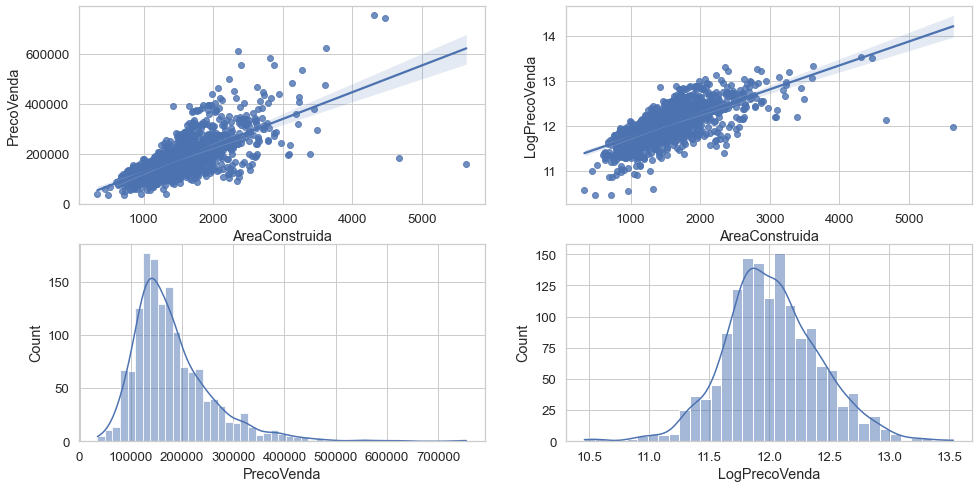

In [39]:
# Plotando preço de venda(target) x área construída

sns.set(font_scale=1.2, style="whitegrid")
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)

sns.histplot(x=df.PrecoVenda, kde=True, ax=axs[1][0])
sns.histplot(x=df.LogPrecoVenda, kde=True, ax=axs[1][1])

sns.regplot(x='AreaConstruida', y='PrecoVenda', data=df, ax=axs[0][0])
sns.regplot(x='AreaConstruida', y='LogPrecoVenda', data=df, ax=axs[0][1])

plt.show()

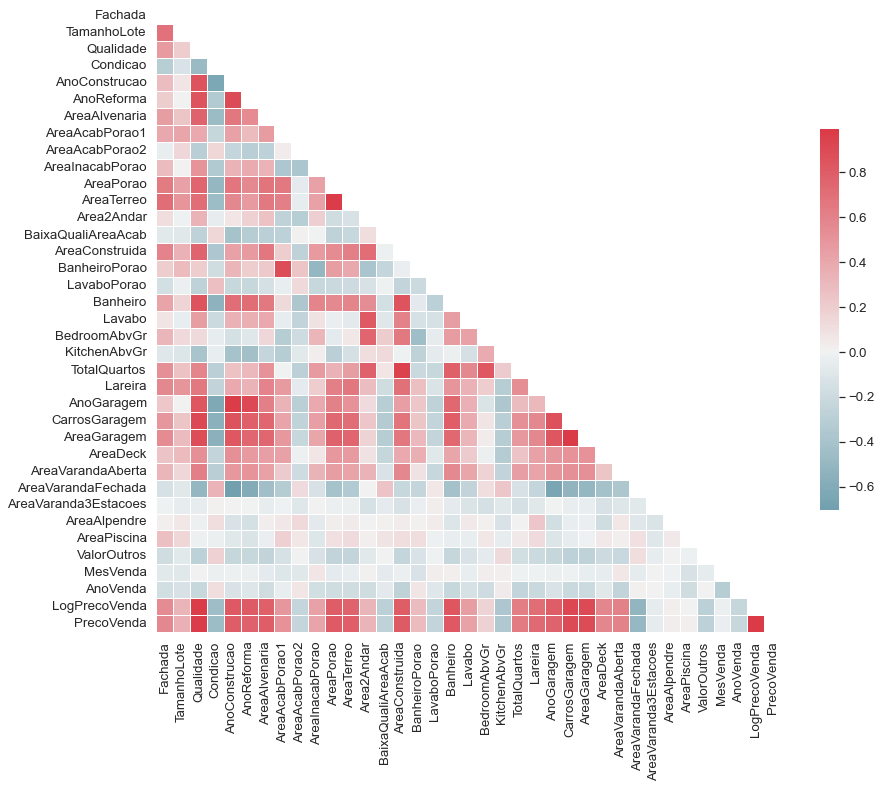

In [75]:
# Matriz de correlação entre as variáveis numéricas

#Função para formatar a matriz de correlação

def plot_corr_matrix(corr_matrix, size=(14, 14)):
    
  # Configura a figura do matplotlib
  fig, ax = plt.subplots(figsize=size)

  # Gera uma cor customizada
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Gera uma ma´scara para o triêngulo superior
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=bool))

  # Gera a mapa de cor com máscara e o ratio correto
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
corr_matrix = df[num_vars + [target]].corr()
plot_corr_matrix(corr_matrix)

In [81]:
# Correlação entra variáveis numéricas e o target

corr_matrix[target].sort_values(ascending=False)

PrecoVenda              1.000000
LogPrecoVenda           0.948374
Qualidade               0.790982
AreaConstruida          0.708624
CarrosGaragem           0.640409
AreaGaragem             0.623431
AreaPorao               0.613581
AreaTerreo              0.605852
Banheiro                0.560664
TotalQuartos            0.533723
AnoConstrucao           0.522897
AnoReforma              0.507101
AnoGaragem              0.486362
AreaAlvenaria           0.477493
Lareira                 0.466929
AreaAcabPorao1          0.386420
Fachada                 0.351799
AreaDeck                0.324413
Area2Andar              0.319334
AreaVarandaAberta       0.315856
Lavabo                  0.284108
TamanhoLote             0.263843
BanheiroPorao           0.227122
AreaInacabPorao         0.214479
BedroomAbvGr            0.168213
AreaAlpendre            0.111447
AreaPiscina             0.092404
MesVenda                0.046432
AreaVaranda3Estacoes    0.044584
AreaAcabPorao2         -0.011378
LavaboPora

In [78]:
# Analisando variáveis categóricas x PreçoVenda

# Configurando a figura do matplot lib

fig = plt.figure(figsize=(25,90))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = "Preço"
    sns.boxplot(x=variable, y="PrecoVenda", data=df)
                                                                         
    plt.ylabel(label)
    plt.show()
    

plt.show()

<Figure size 1800x6480 with 0 Axes>

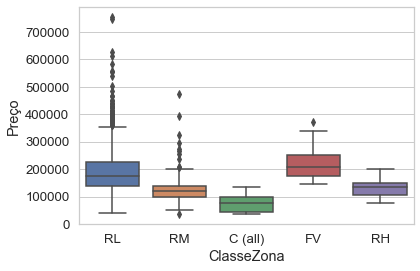

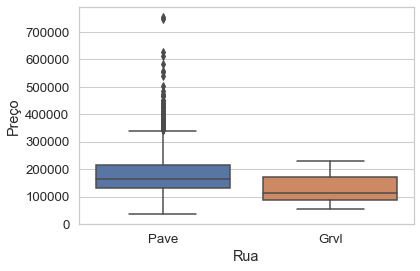

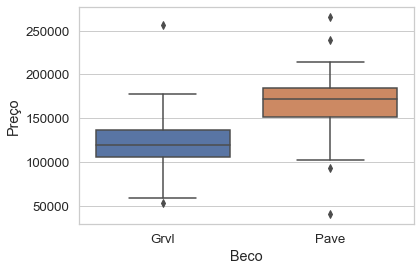

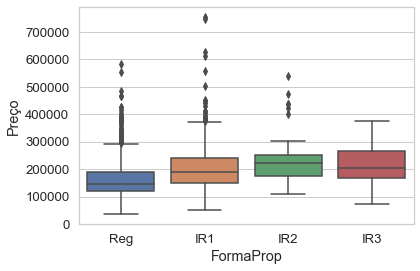

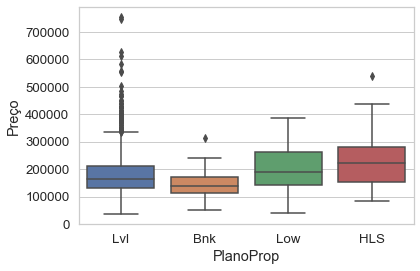

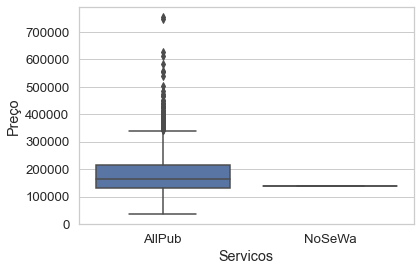

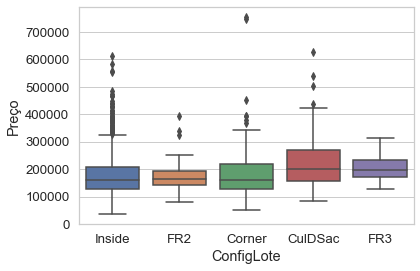

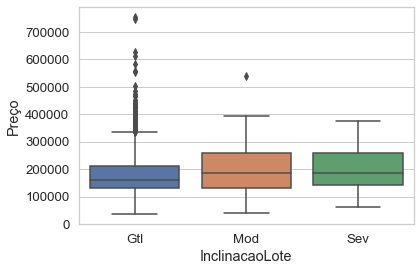

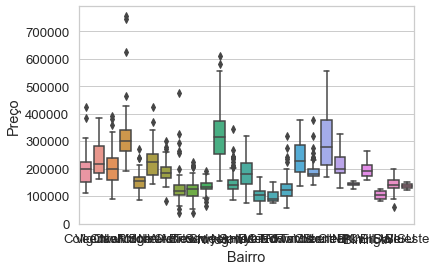

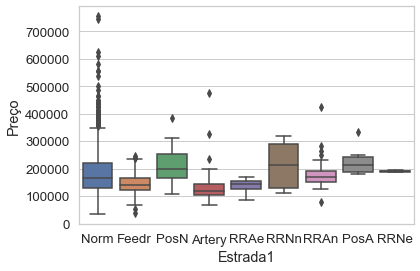

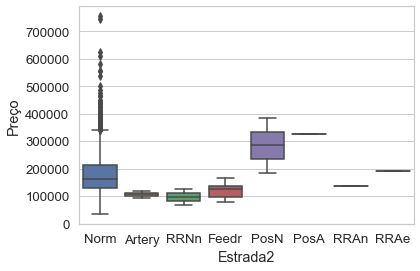

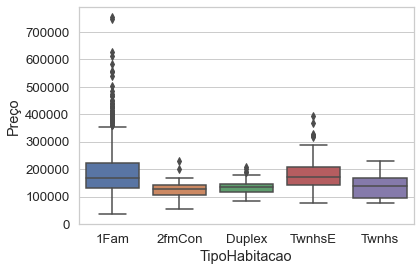

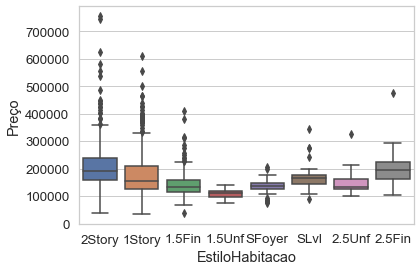

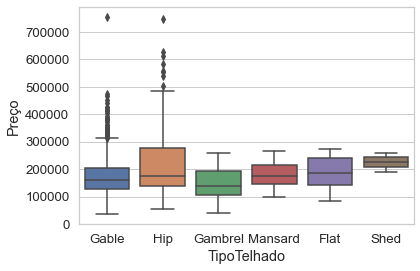

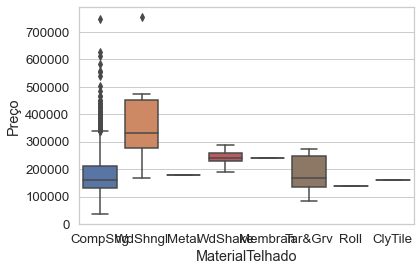

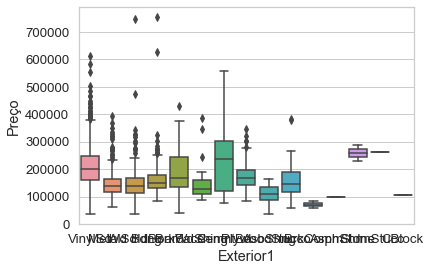

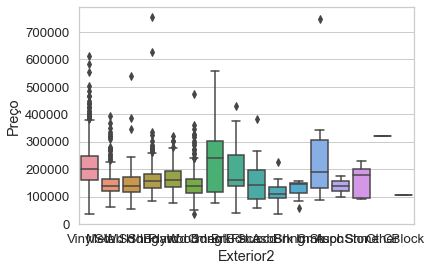

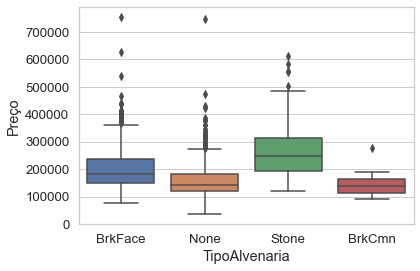

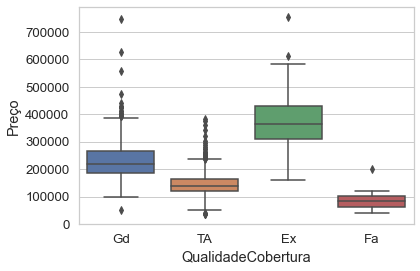

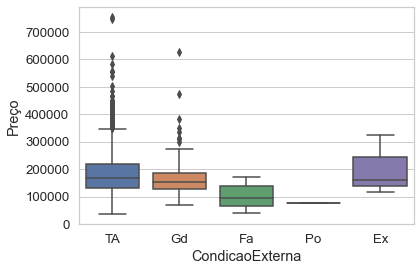

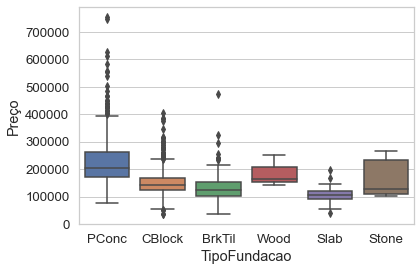

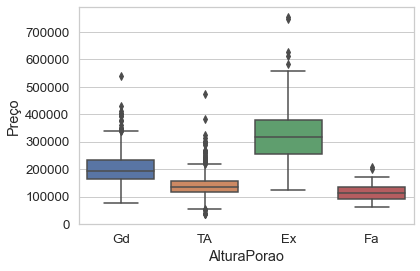

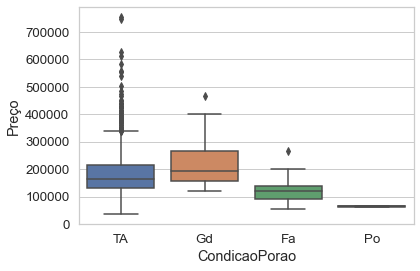

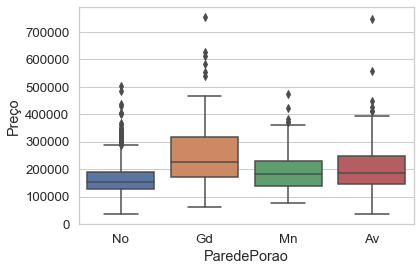

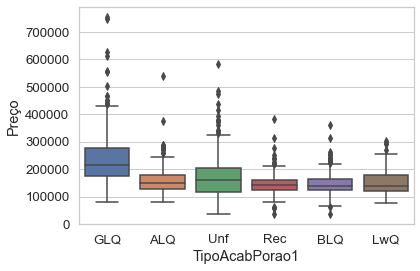

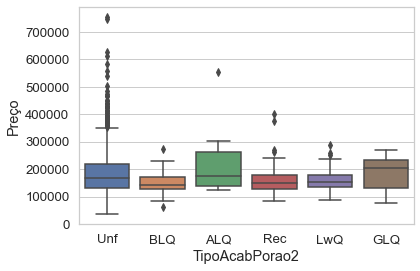

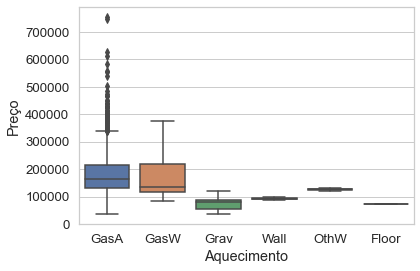

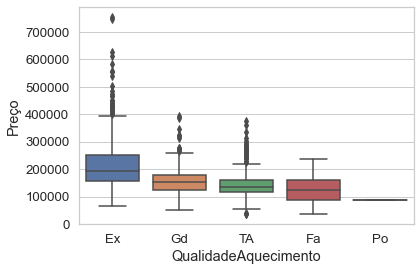

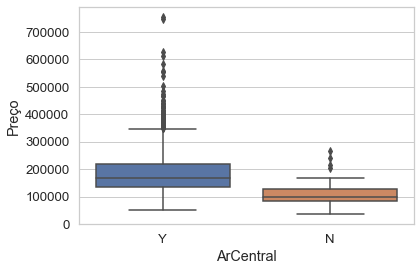

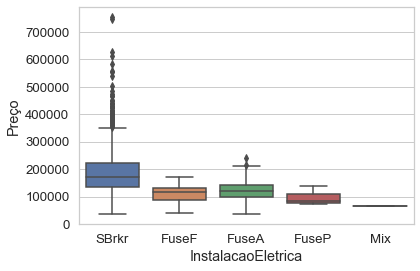

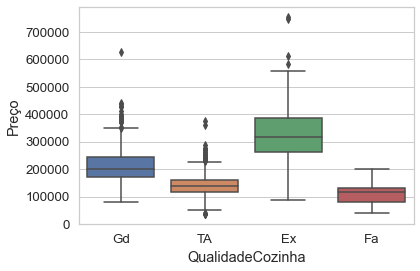

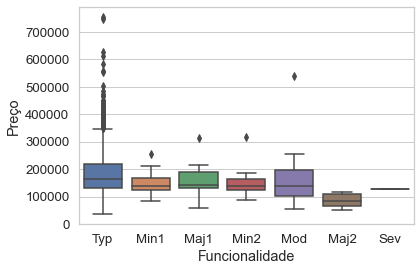

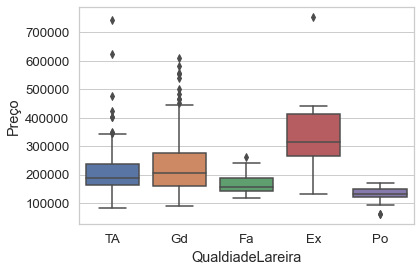

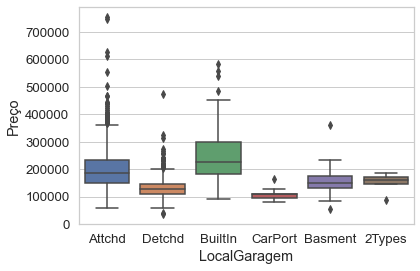

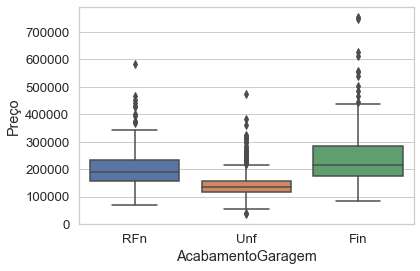

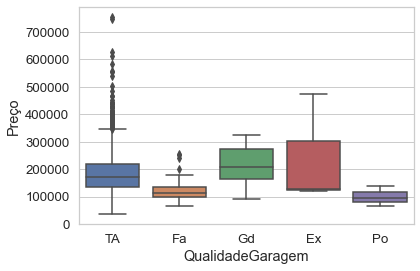

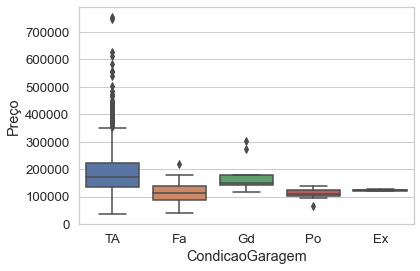

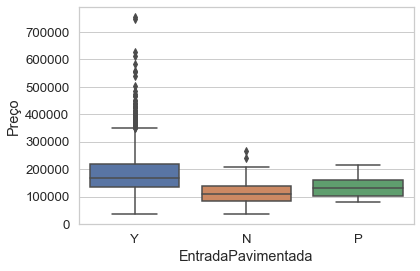

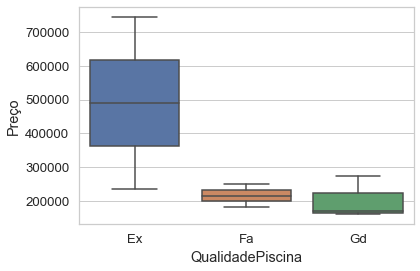

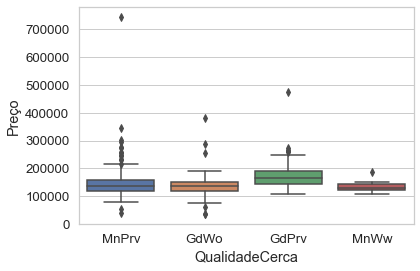

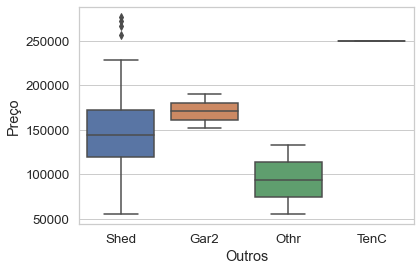

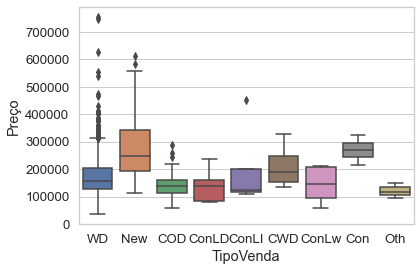

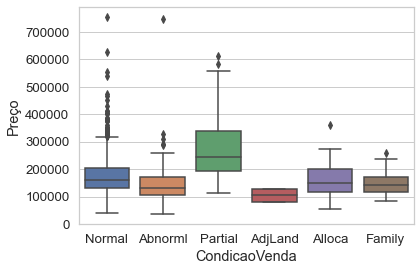

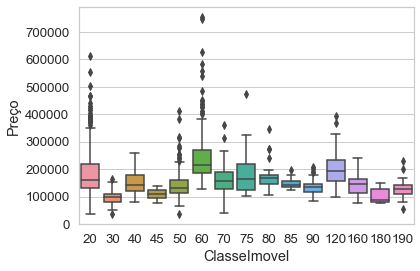

In [79]:
for var in cat_vars:
    grafico_boxplot_grp(df, var, "")

In [ ]:
for var in cat_vars:
    grafico_boxplot_grp(df, var, "")

In [52]:
# Verificando a cardinalidade das variáveis categóricas

print('Cardinalidade médias das categóricas:', np.mean(df[cat_vars].nunique()))
df[cat_vars].nunique().sort_values(ascending=False)

Cardinalidade médias das categóricas: 6.068181818181818


Bairro                  25
Exterior2               16
ClasseImovel            15
Exterior1               15
Estrada1                 9
TipoVenda                9
MaterialTelhado          8
EstiloHabitacao          8
Estrada2                 8
Funcionalidade           7
TipoAcabPorao1           6
LocalGaragem             6
TipoTelhado              6
CondicaoVenda            6
Aquecimento              6
TipoFundacao             6
TipoAcabPorao2           6
QualdiadeLareira         5
QualidadeGaragem         5
CondicaoGaragem          5
InstalacaoEletrica       5
QualidadeAquecimento     5
ClasseZona               5
ConfigLote               5
TipoHabitacao            5
CondicaoExterna          5
FormaProp                4
Outros                   4
QualidadeCerca           4
PlanoProp                4
ParedePorao              4
QualidadeCozinha         4
TipoAlvenaria            4
QualidadeCobertura       4
AlturaPorao              4
CondicaoPorao            4
InclinacaoLote           3
A

* Observações
- Através da análise exploratória podemos levantas algumas idéias:
- A área construída está altamente correlacionada ao preço do imóvel, como pode ser visto nos primeiros gráficos
- Enquanto que fatores como ano de venda, condição geral, área de varanda fechada e Cozinha são inversamente proporcionais ao valor do venda

# Limpeza e tratamento dos dados

In [82]:
# Removendo algumas colunas com muitos dados faltantes, ou que não fazem sentido para a resolução do problema

nans = df.isna().sum()
nans = nans[nans > 0]/len(df)
nans[nans > 0.95]

QualidadePiscina    0.995205
Outros              0.963014
dtype: float64

In [83]:
cols_to_remove = ['QualidadePiscina', 'Outros', 'AnoVenda']

* Criando novas variáveis (feature engineering)

In [87]:
# Selecionando apenas as features de área
area_features = [var for var in num_vars if 'area' in var.lower()]

# Eleveando ao quadrado as features de área
df_area_squared = df[area_features].pow(2)
df_area_squared.columns = [var + '_squared' for var in area_features]
df_processed = pd.concat([df, df_area_squared], axis=1)
print('Novas variáveis ao quadrado: ', list(df_area_squared.columns))

# Dividino o total de alguns itens pela área construida
itens = ['Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira', 'CarrosGaragem']
df_itens_over_area = df_processed[itens].div(df_processed.AreaConstruida, axis=0)
df_itens_over_area.columns = [var + '_sobreArea' for var in itens]
df_processed = pd.concat([df_processed, df_itens_over_area], axis=1)
print('Novas variáveis ao quadrado: ', list(df_itens_over_area.columns))

# Removendo colunas com muitos missings
df_processed.drop(cols_to_remove, axis=1, inplace=True)

# Shape do novo dataset processado
print('df shape antigo: ', df.shape)
print('df shape novo: ', df_processed.shape)

Novas variáveis ao quadrado:  ['AreaAlvenaria_squared', 'AreaAcabPorao1_squared', 'AreaAcabPorao2_squared', 'AreaInacabPorao_squared', 'AreaPorao_squared', 'AreaTerreo_squared', 'Area2Andar_squared', 'BaixaQualiAreaAcab_squared', 'AreaConstruida_squared', 'AreaGaragem_squared', 'AreaDeck_squared', 'AreaVarandaAberta_squared', 'AreaVarandaFechada_squared', 'AreaVaranda3Estacoes_squared', 'AreaAlpendre_squared', 'AreaPiscina_squared']
Novas variáveis ao quadrado:  ['Banheiro_sobreArea', 'Lavabo_sobreArea', 'TotalQuartos_sobreArea', 'Lareira_sobreArea', 'CarrosGaragem_sobreArea']
df shape antigo:  (1460, 81)
df shape novo:  (1460, 99)


In [88]:
# Selecionando novamente as variáveis númericas e categóricas no dataset processado

# variáveis numericas
num_features = df_processed.select_dtypes(include=['int', 'float']).columns.tolist()
num_features.remove('ClasseImovel')
num_features.remove('LogPrecoVenda')
num_features.remove('PrecoVenda')
print(f'numerical features({len(num_features)}): {num_features}')

# variáveis categoricas
cat_features = df_processed.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_features.append('ClasseImovel')
df_processed[cat_features] = df_processed[cat_features].astype("category")
print(f'categorical features({len(cat_features)}): {cat_features}')

# variaveis_removidas = ['AnoVenda', 'LogPrecoVenda', 'PrecoVenda']

numerical features(55): ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AreaAlvenaria_squared', 'AreaAcabPorao1_squared', 'AreaAcabPorao2_squared', 'AreaInacabPorao_squared', 'AreaPorao_squared', 'AreaTerreo_squared', 'Area2Andar_squared', 'BaixaQualiAreaAcab_squared', 'AreaConstruida_squared', 'AreaGaragem_squared', 'AreaDeck_squared', 'AreaVarandaAberta_squared', 'AreaVarandaFechada_squared', 'AreaVaranda3Estacoes_squared', 'AreaAlpendre_squared', 'AreaPiscina_squared', 'Banheiro_sobreArea', 'Lavabo_sobreAre

# 1. Objetivo I - Regressão Linear para interpretabilidade

In [89]:
# Utilizando apenas exemplos onde a variável Condicao é igual à *Normal*

df_lr = df_processed[df_processed.CondicaoVenda == 'Normal'].copy()
df_lr = pd.get_dummies(df_lr, columns=['ArCentral'], drop_first=True)

# Valores da var QualidadeCozinha:
# Ex Excelente
# Gd Bom
# TA Médio / Comum
# Fa Razoável
# Po Ruim

df_lr['QualidadeCozinha'] = df_lr['QualidadeCozinha'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
len(df_lr)

1198


* Variable Inflation Factors(VIF)

O VIF determina a força da correlação entre as variáveis independentes. Prevê-se pegando uma variável e fazendo uma regressão contra qualquer outra variável.

Referencia: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Fixing%20Multicollinearity-,What%20is%20Multicollinearity%3F,variable%20in%20a%20regression%20model.
  

In [94]:
#Função para calcular o VIF

def calc_vif(df):

# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

#Função para plotar o VIF
def plot_vif(vif):
    print('vars: ', list(vif.columns))
    print('Variable Inflation Factors:', vif.VIF.sum(), '\n')

In [98]:
# Usando o VIF para verificar a colinearidade de certos conjutos de variáveis

lr_vars = ['AreaConstruida', 'CarrosGaragem', 'ArCentral_Y', 'AreaPorao', 'Banheiro', 'QualidadeCozinha'] # R2 0.824
plot_vif(calc_vif(df_lr[lr_vars]))

lr_vars = ["AreaConstruida", "Qualidade", "CarrosGaragem", "AreaPorao", "Banheiro", "ArCentral_Y"] # R2 0.852
plot_vif(calc_vif(df_lr[lr_vars]))

vars:  ['variables', 'VIF']
Variable Inflation Factors: 90.16591366626699 

vars:  ['variables', 'VIF']
Variable Inflation Factors: 108.14489255540519 



In [99]:
# Fitando a regressão linear

# Montando a formula da regressao linear
lr_vars = ["AreaConstruida", "Qualidade", "CarrosGaragem", "AreaPorao", "Banheiro", "ArCentral_Y"] # R2 0.852
formula ="LogPrecoVenda ~ " + ' + '.join(lr_vars)
print('formula: ', formula)

# Criando o modelo de regressão linear
model = smf.ols(formula = formula, data = df_lr).fit()

# Plotando o sumário do modelo
print(model.summary())

formula:  LogPrecoVenda ~ AreaConstruida + Qualidade + CarrosGaragem + AreaPorao + Banheiro + ArCentral_Y
                            OLS Regression Results                            
Dep. Variable:          LogPrecoVenda   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1139.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:03:47   Log-Likelihood:                 644.77
No. Observations:                1198   AIC:                            -1276.
Df Residuals:                    1191   BIC:                            -1240.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [100]:
# Verificando o VIF das variáveis escolhidas para compor a regressão linear

vif = calc_vif(df_lr[lr_vars])
print('vars: ', lr_vars)
print('Variable Inflation Factors:', vif.VIF.sum(), '\n')
vif

vars:  ['AreaConstruida', 'Qualidade', 'CarrosGaragem', 'AreaPorao', 'Banheiro', 'ArCentral_Y']
Variable Inflation Factors: 108.14489255540519 



,variables,VIF
0,AreaConstruida,20.561712
1,Qualidade,36.544938
2,CarrosGaragem,11.040106
3,AreaPorao,10.491630
4,Banheiro,17.210607
5,ArCentral_Y,12.295900


,AreaConstruida,Qualidade,CarrosGaragem,AreaPorao,Banheiro,ArCentral_Y
AreaConstruida,1.000000,0.576861,0.465061,0.383522,0.650396,0.076536
Qualidade,0.576861,1.000000,0.564465,0.494476,0.525825,0.255123
CarrosGaragem,0.465061,0.564465,1.000000,0.409797,0.452606,0.211898
AreaPorao,0.383522,0.494476,0.409797,1.000000,0.304859,0.202598
Banheiro,0.650396,0.525825,0.452606,0.304859,1.000000,0.074507
ArCentral_Y,0.076536,0.255123,0.211898,0.202598,0.074507,1.000000


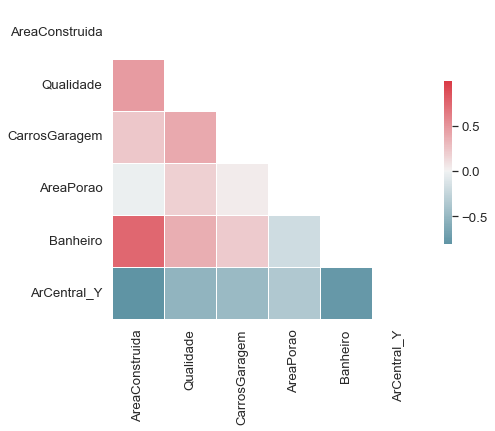

In [101]:
# Correlação das variáveis da regressão linear

corr_matrix = df_lr[lr_vars].corr()

plot_corr_matrix(df_lr[lr_vars].corr(), (7, 6))

corr_matrix

<AxesSubplot:xlabel='AreaConstruida'>

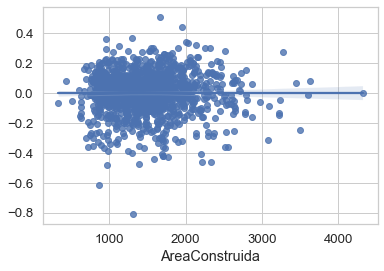

In [102]:
# Checando a Heteroscedasticidade (aumento do erro conforme aumenta a área do imóvel)

sns.regplot(x=df_lr.AreaConstruida , y=model.resid)

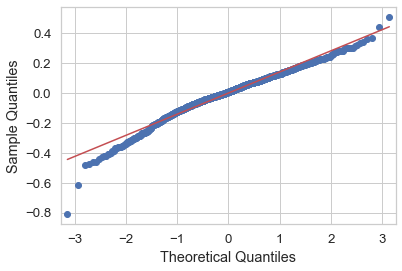

In [103]:
sm.qqplot(model.resid, line="s");

<AxesSubplot:ylabel='Count'>

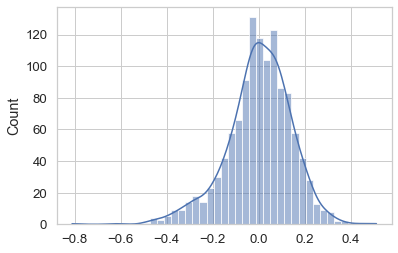

In [104]:
sns.histplot(model.resid, kde=True)

In [105]:
round((np.exp(model.params[1:]) - 1)*100, 2)

AreaConstruida     0.02
Qualidade         10.58
CarrosGaragem      9.41
AreaPorao          0.02
Banheiro           1.56
ArCentral_Y       24.58
dtype: float64

Interpretação dos coeficientes:
* AreaConstruida     0.02% (Aumento de 1 unidade da AreaConstruida aumenta em 0.02% o preço do imóvel)
* Qualidade         10.58% (Para cada aumento do nível de qualidade, indo de 1 (muito ruim) até 10 (Muito excelente), aumenta em 10.58% o preço do imóvel)
* CarrosGaragem      9.41% (Aumento de 1 unidade de CarrosGaragem aumenta em 9.41% o preço do imóvel)
* AreaPorao          0.02% (Aumento de 1 unidade da AreaPorao aumenta em 0.02% o preço do imóvel)
* Banheiro           1.56% (Aumento de 1 unidade de Banheiros aumenta em 1.56% o preço do imóvel)
* ArCentral_Y       24.58% (Presença de ar condicionado central aumenta 24.58% o valor do imóvel)

# 2. Objetivo II: poder preditivo, regressão via random forest

In [107]:
#Função para criar Datasets de Treino, validação e teste
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

In [108]:
# Splitando os dados em treino e teste

features = num_features + cat_features

(
  X_train, X_test, 
  X_val, y_train, 
  y_test, y_val
) = train_test_valid_split(df_processed, features=features, target=target, test_size=0.3, valid_size=0.5, random_state=42)

print('X Train shape', X_train.shape)
print('X Val shape', X_val.shape)
print('X Test shape', X_test.shape)

X Train shape (1022, 97)
X Val shape (219, 97)
X Test shape (219, 97)


Pre-processamento dos datasets de treino, teste e validação

In [111]:
def random_forest_preprocessing(X_train, X_val, X_test, y_train):

  # Preprocessamento categóricas (imputando missing)
    cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
    X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
    X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

    cat_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
    X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
    X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
    X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

  # Preprocessamento de categóricas(encoders)
    target_encoder = TargetEncoder()
    X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
    X_val[cat_features] = target_encoder.transform(X_val[cat_features])
    X_test[cat_features] = target_encoder.transform(X_test[cat_features])

  # Preprocessamento numéricas (imputando missing)
    num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
    X_val[num_features] = num_imputer.transform(X_val[num_features])
    X_test[num_features] = num_imputer.transform(X_test[num_features])

    return X_train, X_val, X_test

X_train, X_val, X_test = random_forest_preprocessing(X_train.copy(), X_val.copy(), X_test.copy(), y_train)

## Fitando um RandomForest baseline

In [113]:
# Função de métricas

def metrics_report(y, y_pred, dataset_name='valid'):
    mean_y = np.mean(y)
    mean_pred = np.mean(y_pred)

    rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
  
    report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

    report[dataset_name] = report[dataset_name].round(2)
    return report

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf_baseline = RandomForestRegressor(random_state=42)
# Treino
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

,metric,validation
0,RMSE,28201.24
1,MAE,16561.61
2,R^2,0.90
3,MAPE,0.09
4,Avg. target,174313.75
5,Avg. Prediction,171594.96


## Achando os melhores hiperparâmetros para o RandomForest

In [115]:
# hiperparametros: n_estimators: [], max_features: [], min_samples_leaf: []

for n_estimators in [10, 30, 50, 70, 100, 150, 200]:
    print(f'Random forest, with n_estimators {n_estimators}')
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 29830.096709926394

Random forest, with n_estimators 30
rmse: 29456.04901134411

Random forest, with n_estimators 50
rmse: 29504.202718893208

Random forest, with n_estimators 70
rmse: 28401.53851655764

Random forest, with n_estimators 100
rmse: 28201.241333441532

Random forest, with n_estimators 150
rmse: 28303.09381373777

Random forest, with n_estimators 200
rmse: 28461.653877996003



In [116]:
# hiperparametros: n_estimators: [150], max_features: [], min_samples_leaf: []

for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6]:
    print(f'Random forest, with max_features {max_features}')
    rf_model = RandomForestRegressor(n_estimators=150, max_features=max_features, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 29460.103049913483

Random forest, with max_features 0.1
rmse: 29460.103049913483

Random forest, with max_features 0.2
rmse: 28362.761607611334

Random forest, with max_features 0.3
rmse: 27113.51143598948

Random forest, with max_features 0.4
rmse: 27474.68330443565

Random forest, with max_features 0.6
rmse: 27624.867528230505



In [ ]:
# hiperparams: n_estimators: [100], max_features: [0.3], min_samples_leaf: []

for min_samples_leaf in list(range(1,6)):
    print(f'Random forest, with min_samples_leaf {min_samples_leaf}')
    rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= min_samples_leaf, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 27241.38692216558

Random forest, with min_samples_leaf 2
rmse: 28106.10814576189

Random forest, with min_samples_leaf 3
rmse: 29461.733689872966

Random forest, with min_samples_leaf 4
rmse: 30432.507172291633

Random forest, with min_samples_leaf 5
rmse: 31222.58036385704



## Random Forest com os melhores hiperparâmetros

In [ ]:
# hiperparametros: n_estimators: [100], max_features: [0.3], min_samples_leaf: [1]

rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

,metric,validation
0,RMSE,27241.39
1,MAE,16155.45
2,R^2,0.90
3,MAPE,0.09
4,Avg. target,174313.75
5,Avg. Prediction,172298.50


## Importância das features

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

print('Running permutation feature importance')
permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Running permutation feature importance


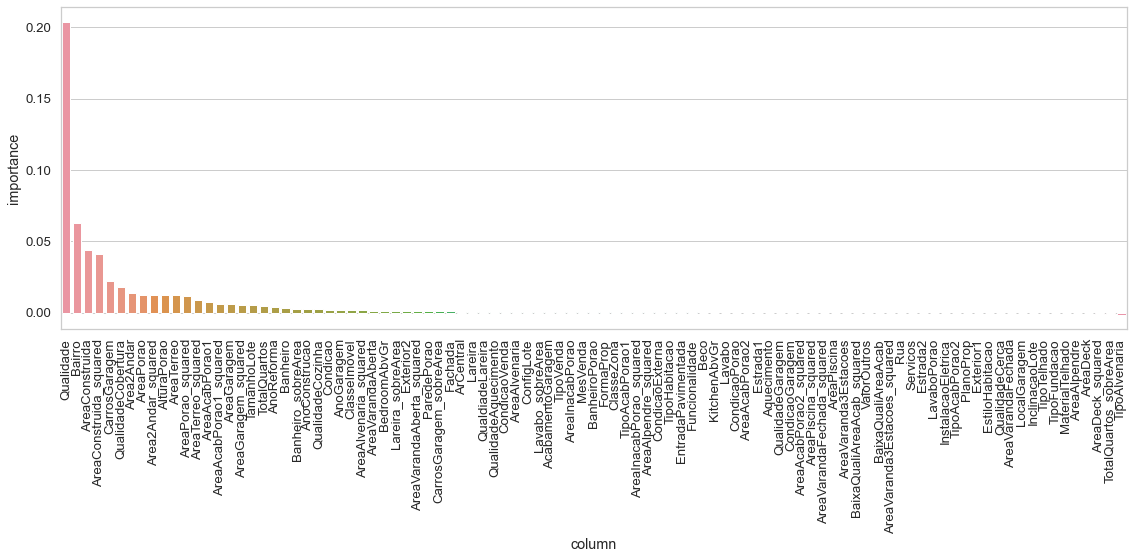

In [122]:
# plotando o permutation feature importance

importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(16,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [119]:
# Mostrando as melhores variáveis 

best_features = importances.head(25).column.tolist()
print(best_features)

['Qualidade', 'Bairro', 'AreaConstruida', 'AreaConstruida_squared', 'CarrosGaragem', 'QualidadeCobertura', 'Area2Andar', 'AreaPorao', 'Area2Andar_squared', 'AlturaPorao', 'AreaTerreo', 'AreaPorao_squared', 'AreaTerreo_squared', 'AreaAcabPorao1', 'AreaAcabPorao1_squared', 'AreaGaragem', 'AreaGaragem_squared', 'TamanhoLote', 'TotalQuartos', 'AnoReforma', 'Banheiro', 'Banheiro_sobreArea', 'AnoConstrucao', 'QualidadeCozinha', 'Condicao']


## Retreinando o RandomForest apenas com as top 25 variáveis mais importantes

In [123]:
# Fitando  modelo Randomforest final

rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train[best_features], y_train)

# Computando predições
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Computando treino, validação e teste das métricas
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(features)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 97)
            metric  validation
0             RMSE    28201.24
1              MAE    16561.61
2              R^2        0.90
3             MAPE        0.09
4      Avg. target   174313.75
5  Avg. Prediction   171594.96

Final report (total features: 25)
            metric      train  validation       test
0             RMSE   11496.95    25518.51   22414.83
1              MAE    6458.86    15361.83   14815.26
2              R^2       0.98        0.91       0.92
3             MAPE       0.04        0.09       0.10
4      Avg. target  181312.69   174313.75  185701.65
5  Avg. Prediction  181176.01   172153.66  185965.47


Running permutation feature importance with the final model on the held-out testing set


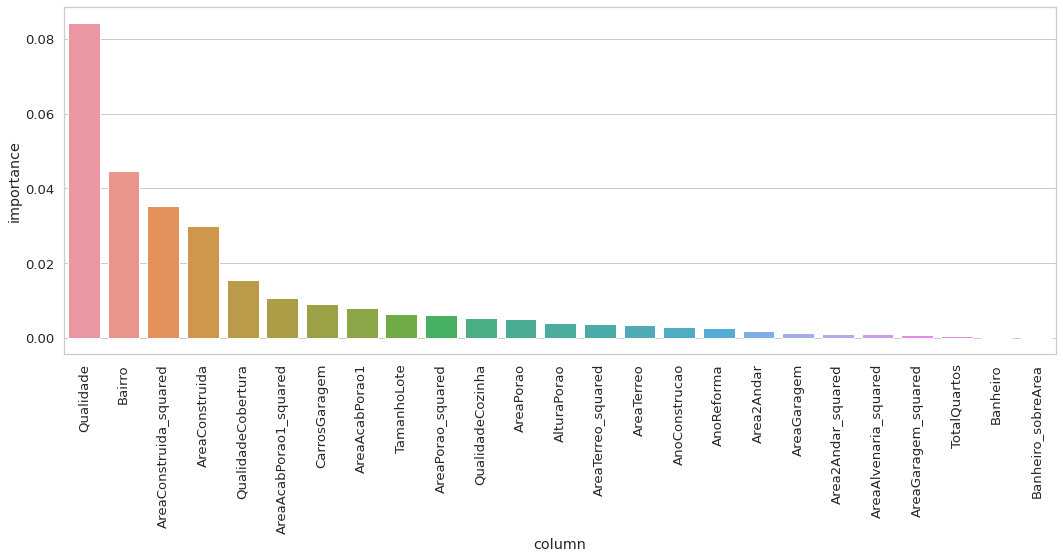

In [ ]:
# Plotando variaveis mais importantes

print('Running permutation feature importance with the final model on the held-out testing set')
permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

* Observações finais

1) A Variável mais importante foi a 'Qualidade' o que significa que preço de venda de um imóvel é impactado diretamente pelo 'Material geral e qualidade de acabamento'.

2) A segunda mais importante foi o 'Bairro' : 'Locais dentro dos limites da cidade de Ames', ou seja quanto mais próximo do centro mais caro.

3) E a terceira variável foi 'Área construída': a quantidade de m2 construído impacta diretamente no valor do imóvel.
